##Part 2


> # Reading the Data and loading libraries






The Dataset
autolib_daily_events_postal_code.csv is a dataset on electric car usage derived from Autolib, an electric car-sharing service company. From it the area of interest chosen randomly (by simple Random sampling) was postal code 75012 and 93310.The periods, weekdays, were chosen non-randomly.  


The claim here is that there is a difference between the mean of blue cars taken in postal code 75012 and postal code 93310.

The null hypothesis is that there is no difference between the mean of blue cars taken in postal code 75012 and postal code 93310.


Ho:μ1=μ2


The alternate hypothesis is that the claim  .i.e. there is a difference between the mean of blue cars taken in postal code 75012 and postal code 93310.

Ha:μ1≠μ2



In [1]:
#Process of hypothesis testing followed, documented in the word document


# State the research hypothesis as a null hypothesis and alternate hypothesis (Ho) and (Ha or H1).
# Performing an appropriate statistical test.
# Deciding whether to reject or fail to reject your null hypothesis.
# Presenting the findings in your results and discussion section.

In [2]:
#
# DataSet url= 'https://bit.ly/DSCoreAutolibDataset'
# Data glossary Link='https://bit.ly/DSCoreAutolibDatasetGlossary'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Autolib_Data=pd.read_csv("https://bit.ly/DSCoreAutolibDataset")
Autolib_Data.head(20)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


### Outlier Detection and treatment of missing Values

In [3]:
# Determining unique values in each column
Autolib_Data.nunique()
Autolib_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


Determining unique values in each column

In [4]:
Autolib_Data.shape

(16085, 13)

In [5]:
Autolib_Data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [6]:
Autolib_Data.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [7]:
# Autolib_Data['Postal code'].unique()
# Autolib_Data['dayOfWeek'].unique()
Autolib_Data['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

     Non-Probability Sampling-Purposive Sampling

In sampling for area of interest I want to work with postal codes with  the most data,because more data is good for me as a data scientist.

In sampling for Periods of sampling I will work with weekdays 


In [8]:



postalCode_156=Autolib_Data.groupby(['Postal code'])['Postal code'].count().sort_values(ascending=False).head(90)
postalCode_sample = postalCode_156.sample(n = 2)
print(postalCode_sample)

#75012 and 93310


Postal code
75017    156
92370    156
Name: Postal code, dtype: int64


     #Probability Sampling-Simple Random Sampling
 I will be working with two postal codes selected randomly 

(by use of simple random Sampling)from the group of postal codes with max count(156). 


From it the area of interest chosen randomly (by simple Random sampling) was postal code 75012 and 93310.The periods, weekdays, were chosen non-randomly.  

In [9]:
#SampleData
a=Autolib_Data['Postal code'] == 75012
b=Autolib_Data['Postal code'] == 93310 
c=Autolib_Data['day_type'] == 'weekday' 
Autolib_SampleData=Autolib_Data.loc[(a|b) & c]
Autolib_SampleData

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1716,75012,1/1/2018,1440,0,weekday,502,512,7,6,32,35,122,120
1717,75012,1/2/2018,1438,1,weekday,406,412,15,15,22,23,109,109
1718,75012,1/3/2018,1439,2,weekday,427,423,11,16,31,29,92,95
1719,75012,1/4/2018,1320,3,weekday,395,392,14,11,22,25,91,94
1720,75012,1/5/2018,1440,4,weekday,476,478,19,18,23,25,114,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11484,93310,6/13/2018,1440,2,weekday,14,16,0,0,7,8,0,0
11485,93310,6/14/2018,1439,3,weekday,14,15,2,2,4,3,0,0
11486,93310,6/15/2018,1440,4,weekday,20,18,0,0,0,1,0,0
11489,93310,6/18/2018,1440,0,weekday,15,16,3,2,1,1,0,0


In [10]:
Autolib_SampleData.tail(112)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
11335,93310,1/1/2018,1440,0,weekday,19,20,6,5,1,1,0,0
11336,93310,1/2/2018,1438,1,weekday,12,10,0,0,0,0,0,0
11337,93310,1/3/2018,1439,2,weekday,12,15,3,3,0,0,0,0
11338,93310,1/4/2018,1320,3,weekday,8,7,0,1,2,2,0,0
11339,93310,1/5/2018,1440,4,weekday,13,8,2,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11484,93310,6/13/2018,1440,2,weekday,14,16,0,0,7,8,0,0
11485,93310,6/14/2018,1439,3,weekday,14,15,2,2,4,3,0,0
11486,93310,6/15/2018,1440,4,weekday,20,18,0,0,0,1,0,0
11489,93310,6/18/2018,1440,0,weekday,15,16,3,2,1,1,0,0


In [11]:
# Autolib_SampleData['Postal code'].unique()
# Autolib_SampleData['dayOfWeek'].unique()
Autolib_SampleData['day_type'].unique()

array(['weekday'], dtype=object)

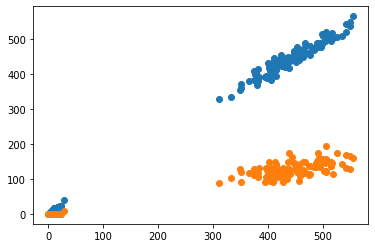

In [12]:
plt.scatter(Autolib_SampleData["BlueCars_taken_sum"] , Autolib_SampleData["BlueCars_returned_sum"])
plt.scatter(Autolib_SampleData["BlueCars_taken_sum"] , Autolib_SampleData["Slots_freed_sum"])

Univariate Analysis

In [ ]:
#Creating pair plots for the dataset
sns.pairplot(Autolib_SampleData )
plt.show()

# univariate and bivariate summaries

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='dayOfWeek')


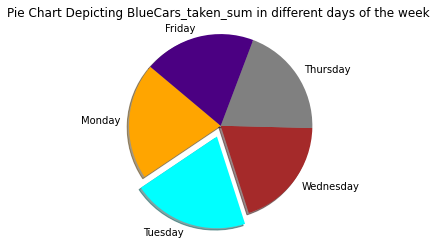

In [14]:
b=Autolib_SampleData .groupby(['dayOfWeek'])['BlueCars_taken_sum'].count()
c=b.index
print(c)
index_values =("Monday", "Tuesday", "Wednesday", "Thursday","Friday")

expl=(0,0.125,0,0,0)
colors = ( "orange", "cyan", "brown", "grey", "indigo")
plt.pie(b, labels=index_values, shadow = True, startangle = 140,colors=colors,explode=expl)
plt.axis('equal')
plt.title('Pie Chart Depicting BlueCars_taken_sum in different days of the week ')
plt.show()

In [ ]:
##Population parameters for postal code 75012
import statistics
a=Autolib_SampleData.loc[Autolib_SampleData['Postal code'] == 75012]
b=pd.DataFrame(a)
BlueCars_taken_sum_summed75012=b['BlueCars_taken_sum'].sum()
BlueCars_taken_sum_Mean75012=b['BlueCars_taken_sum'].mean()
BlueCars_taken_sum_Std75012=b['BlueCars_taken_sum'].std()
BlueCars_taken_sum_Mean75012

440.58035714285717

In [ ]:
##Population parameters for postal code 993310
d=Autolib_SampleData.loc[Autolib_SampleData['Postal code'] == 93310]
e=pd.DataFrame(d)
BlueCars_taken_sum_summed93310=e['BlueCars_taken_sum'].sum()
BlueCars_taken_sum_Mean93310=e['BlueCars_taken_sum'].mean()
BlueCars_taken_sum_Mean93310

14.428571428571429

In [ ]:
##Creating a sample for postal code 75012 and deriving the sample parameters 
postalCode75012BlueCars_taken_sample = b.sample(n = 40)
postalCode75012BlueCars_taken_Variance=statistics.variance((postalCode75012BlueCars_taken_sample['BlueCars_taken_sum']))
n1=40
postalCode75012BlueCars_taken_mean=postalCode75012BlueCars_taken_sample['BlueCars_taken_sum'].mean()
postalCode75012BlueCars_taken_mean

441.95

In [ ]:
##Creating a sample for postal code 93310 and deriving the sample parameters 
postalCode93310BlueCars_taken_sample = e.sample(n = 50)
postalCode93310BlueCars_taken_Variance=statistics.variance((postalCode93310BlueCars_taken_sample ['BlueCars_taken_sum']))
n2=50

Hypothesis Testing Procedure

The test statistic chosen was the Z-Score. This is because the samples that the researcher was working with are greater than 30 and because the sample variances can be obtained from the data.

A confidence level of 0.05 is used.


 Z-Score is used as the test statistic


In [ ]:
#Calculating   for Z-Score
# calculating denominator 
import math
toBeSquarerooted= (((postalCode75012BlueCars_taken_Variance)**2)/n1)+ (((postalCode93310BlueCars_taken_Variance)**2)/n2)
VarianceDenominator=math.sqrt(toBeSquarerooted)
# calculating numerator
VarianceNumerator=BlueCars_taken_sum_Mean75012-BlueCars_taken_sum_Mean93310
Z_Score=VarianceNumerator/VarianceDenominator
Z_Score


1.1254429527727823

In [ ]:
#Point estimate for parameter is the sample mean whch estimates the population mean
# Working with postl code 75012
postalCode75012BlueCars_taken_mean=postalCode75012BlueCars_taken_sample['BlueCars_taken_sum'].mean()
postalCode75012BlueCars_taken_mean


441.95

The point estimate parameter is the sample mean which estimates the population mean. Since the researcher was working with two populations, the area of postal code 75012 is chosen whose sample mean is 441.95. The Confidence interval around the parameter is further calculated yielding  421.917 < populationmean < 461.983. In reality the mean of this particular population is 440.58035714285717 which lies with the range shown above.

Point estimate for parameter is the sample mean whch estimates the population mean

Working with postl code 75012

In [ ]:
# Calculating the Confidence inerval aound the parameter
# The z- statistic is used
# E=(za/2)*sigma/sqrt(n)
# since we are using a level of sigificance of 0.05 the critical value from our z tables is 1.96
import math
BlueCars_taken_sum_Std75012=b['BlueCars_taken_sum'].std()
print(BlueCars_taken_sum_Std75012)
E=1.96*(BlueCars_taken_sum_Std75012/(math.sqrt(40)))
print(E)
##From the above calcultions we have 
# xbar -E < populationmean <xbar+ E

x=postalCode75012BlueCars_taken_mean+E
y=postalCode75012BlueCars_taken_mean-E
print(x)
print(y)
#Thus we have the intrval shown below 
# 421.917 < populationmean < 461.983

64.64199934369744
20.032763142452954
461.98276314245294
421.91723685754704


Thus we have the interval shown below 
 421.917 < populationmean < 461.983

Summary and Conclusion

The hypothesis testing was successfully carried out. It begun with coming up with the null and alternate hypothesis as indicated in the problem statement. A test statistic was then chosen, which in this case was the z-score. From computations, done in python the z-score obtained was 1.125 which lies in the rejection area of the normal curve and thus the alternate hypothesis was retained i.e.  there is a difference between the mean of blue cars taken in postal code 75012 and postal code 93310.

With this knowledge the researcher would delve deeper in the other phase of this project and find out now that the means differ where, between the two postal codes do we have higher means and try to find out the factors that contribute to that.
